In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from util import data
from util import visualisation as visu
from util import management as mana
from util import constants as con

# Fill in the task and either test or train
task = con.TASK_600
tstr = con.TRAIN

In [2]:
modality = con.MODALITY_MAPPING[task]
data_path = f"C:/Users/ikke_/OneDrive/Documenten/Thesis/Data/nnUNet_raw_data_base/nnUNet_raw_data/Task{task}"
img_path = f'{data_path}/images{tstr}'
label_path = f'{data_path}/labels{tstr}'

Interactively show a scan slice + ground truth of a 3D scan

In [3]:
def dicom_animation(x):
    ''' function to interactively viusualise a scan and the ground truth

        input:
            int x - the slice number

        prerequisite: the variables 'img' and 'label' need to be in memory
    '''
    # get specific slice
    gt, img_slice = data.get_gt_img_slice(img, label, x)
    print(f'Image dimensions: {img.shape}')

    # show label 
    f = plt.figure(figsize=(30,30))
    a1 = f.add_subplot(2, 2, 1)
    plt.imshow(gt, cmap=plt.cm.gray)

    # show scan + label
    a1 = f.add_subplot(2, 2, 2)
    plt.imshow(img_slice, cmap=plt.cm.gray)
    plt.imshow(gt, cmap=plt.cm.jet_r, alpha=0.1)

    # show scan
    a1 = f.add_subplot(2, 2, 3)
    plt.imshow(img_slice, cmap=plt.cm.gray)
    plt.show()

    return x

rel_patient_id = 0 # the relative patient id in the folder 
patient_id = mana.get_patient_id_from_rel_id(img_path, rel_patient_id) # patient id in file name

print("Visualising patient " + patient_id)
img = data.get_3d_img(img_path, patient_id, modality)
label = data.get_3d_img(label_path, patient_id)

# slide through dicom images using a slide bar
data.interact(dicom_animation, x=(0, img.shape[2]-1))

Visualising patient 0507


interactive(children=(IntSlider(value=35, description='x', max=71), Output()), _dom_classes=('widget-interact'…

<function __main__.dicom_animation(x)>

Visualise the scan in 3D

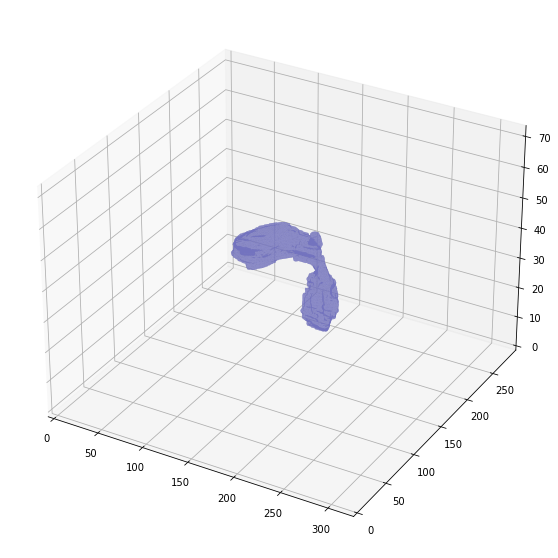

In [4]:
visu.plot_3d(label)

Visualise the 3D scan in 2D by showing all views

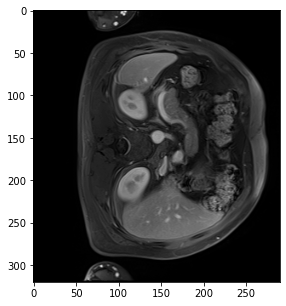

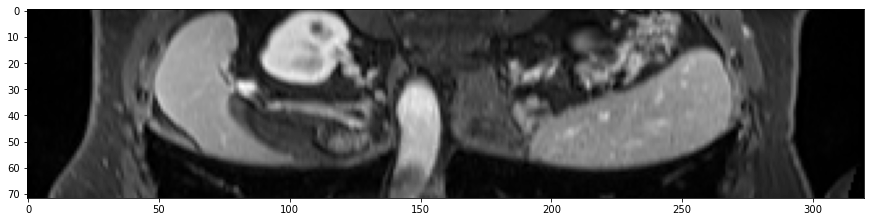

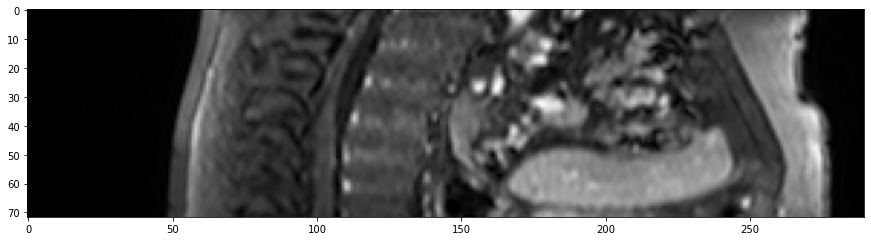

In [5]:
def show_2d_slices_all_views_from_img3d(img3d):
    plt.figure(figsize = (15,15))
    img_shape = img3d.shape

    # plot 3 orthogonal slices from the middle
    a1 = plt.subplot(1, 3, 1)
    plt.imshow(img3d[:, :, img_shape[2]//2], cmap=plt.cm.gray)


    plt.figure(figsize = (15,15))
    #a2 = plt.subplot(1, 3, 2)
    plt.imshow(img3d[:, img_shape[1]//2, :].T, cmap=plt.cm.gray)

    plt.figure(figsize = (15,15))
    plt.imshow(img3d[img_shape[0]//2, :, :].T, cmap=plt.cm.gray)

    plt.show()
    
show_2d_slices_all_views_from_img3d(img)